# Keras/TensorFlow

Keras is an API. 

remember: An API (Application Programming Interface), is ... intermediary software that facilitates communication between 2 other pieces of software. ([Course material 6.1.1.](https://krspiced.pythonanywhere.com/chapters/project_pipeline/api/README.html?highlight=api#what-is-an-api))

Keras "connects" python with TensorFlow.  

Tensorflow is the platform we use to work with neural networks. It uses dataflow graphs ([think about back and forward propagation](https://colah.github.io/posts/2015-08-Backprop/)). It is written in Cuda (a parallel computing platform working on GPUs) and C++ for performance.

Keras (https://keras.io/about/) is a deep learning API written in Python to handle several backends (TensorFlow, Microsoft Cognitiv Toolkit, Theano). Since TensorFlow 1.4 it is part of TensorFlow. It was developed with a focus on enabling fast experimentation.



### What is a tensor?
etymological origin: tension => stress/strain (in 3D structures)

![image](figures/ranks.jpg)

It's an n dimensional object, which can contain the weights of the different layers, activation functions, etc., etc., ... (any python object).

In [1]:
# what I needed to do/install after "conda create -n tensor":

# conda activate tensor
# sudo apt install python3-pip
# pip install --upgrade pip
# pip install tensorflow
# pip install opencv-python
# pip install jupyter
# pip install sklearn
# pip install matplotlib
# pip install pandas

# (my versions in 'tensor'-env: python: 3.8.10, tensorflow/keras: 2.7.0)

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

from IPython import display

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0
GPU is NOT AVAILABLE


In [2]:

scalar = np.array(6)

vector = np.array([7, 2, 9, 10])

matrix = np.array([[5.2, 3.0, 4.5],[9.1, 0.1, 0.3]])

tensor3 = np.array([[[1,4,7], [2,9,7], [1,3,0], [9,6,9]], [[2,3,4], [4,3,5], [7,7,2], [3, 9, 8]]])

tensor7 = np.random.rand(3,2,4,7,1,2,9)

print(f'\'scalar\' has {scalar.ndim} dimensions and a shape of {scalar.shape}.')
print(f'\'vector\' has {vector.ndim} dimension and a shape of {vector.shape}.')
print(f'\'matrix\' has {matrix.ndim} dimensions and a shape of {matrix.shape}.')
print(f'\'tensor3\' has {tensor3.ndim} dimensions and a shape of {tensor3.shape}.')
print(f'\'tensor7\' has {tensor7.ndim} dimensions and a shape of {tensor7.shape}.')

'scalar' has 0 dimensions and a shape of ().
'vector' has 1 dimension and a shape of (4,).
'matrix' has 2 dimensions and a shape of (2, 3).
'tensor3' has 3 dimensions and a shape of (2, 4, 3).
'tensor7' has 7 dimensions and a shape of (3, 2, 4, 7, 1, 2, 9).


In [3]:
tensor3

array([[[1, 4, 7],
        [2, 9, 7],
        [1, 3, 0],
        [9, 6, 9]],

       [[2, 3, 4],
        [4, 3, 5],
        [7, 7, 2],
        [3, 9, 8]]])

If your notebook or the dependencies create problems, you can try using [Google colab](https://colab.research.google.com) (login required). Many students use it for their final project. Be aware of time limits (and save intermediate results).

[tensorflow playground](https://playground.tensorflow.org)

[activation functions](https://himanshuxd.medium.com/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e)

## "Challenge"
Assume you have this labeled data (color codes according to the two half moons). 
![moon problem](figures/moons.png)
Task: Predict, whether an arbitrary new point belongs to the upper or to the lower half moon.  
What information do we have as input?

# Solution with Tensorflow

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500,noise=0.2,random_state=3)

In [5]:
X

array([[-3.36298938e-01,  1.06167458e+00],
       [ 1.02679681e-01,  1.61559272e-01],
       [ 6.45039054e-01,  5.49713259e-01],
       [-1.22710505e+00, -1.34821943e-01],
       [-8.01650123e-01,  6.55490102e-01],
       [ 1.34289248e+00, -2.42445767e-01],
       [ 7.19870424e-01, -1.55823686e-02],
       [ 7.26696917e-01,  5.39399760e-01],
       [-6.86881580e-01,  2.98205404e-01],
       [ 1.76858996e+00,  2.43190890e-01],
       [-6.11494099e-01,  9.67031261e-01],
       [-3.05062729e-01,  9.24479752e-01],
       [-6.51903213e-01,  1.49743350e-04],
       [ 5.35448853e-01, -3.14679655e-01],
       [ 1.55298872e+00,  4.94638424e-02],
       [-6.80223137e-01,  6.33954831e-01],
       [ 1.33461301e+00, -2.29662585e-01],
       [ 1.64765905e-01,  9.24853193e-01],
       [ 8.20311363e-01,  8.53295416e-01],
       [ 2.04807086e+00,  8.51478012e-02],
       [-5.05373634e-01,  1.24052976e+00],
       [ 1.93060482e-01,  9.74821591e-01],
       [ 2.26171425e+00,  2.32116971e-01],
       [ 1.

In [6]:
y

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [7]:
 # x axis 
X[:,0]

array([-3.36298938e-01,  1.02679681e-01,  6.45039054e-01, -1.22710505e+00,
       -8.01650123e-01,  1.34289248e+00,  7.19870424e-01,  7.26696917e-01,
       -6.86881580e-01,  1.76858996e+00, -6.11494099e-01, -3.05062729e-01,
       -6.51903213e-01,  5.35448853e-01,  1.55298872e+00, -6.80223137e-01,
        1.33461301e+00,  1.64765905e-01,  8.20311363e-01,  2.04807086e+00,
       -5.05373634e-01,  1.93060482e-01,  2.26171425e+00,  1.62209177e-01,
        9.05983341e-01, -5.14495023e-01, -1.00853461e+00,  1.74118178e+00,
        1.17698911e+00, -1.18273662e-01,  4.80335154e-01,  1.15444653e+00,
        5.03727475e-01,  1.03561819e-01, -9.69263570e-01, -4.73250984e-01,
        7.92778235e-01,  1.57565220e+00,  2.39672151e-01, -7.26466181e-02,
        7.48096121e-01,  3.21652714e-01, -1.03081597e+00, -6.93737491e-01,
       -1.04490482e+00, -1.18454484e-01, -1.70635451e-01, -1.00385835e+00,
        1.34643610e+00,  5.03285220e-01, -7.14779994e-01,  1.62205190e+00,
       -5.13239711e-01,  

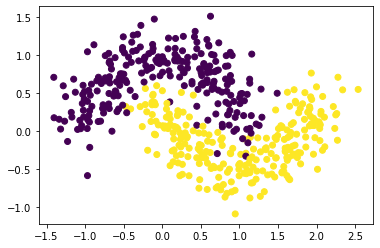

In [8]:
# scatter plot
plt.scatter(X[:,0],X[:,1],c=y)

## Recipe to Building and Artificial Neural Network 

1. **configure a model, give**:
    + architecture
    + number of neurons
    + layers
    + type of activation functions
    
2. **compile the model, give**:
    + optimizers (algorithm that finds the minimum of the loss function)
    + loss function (the loss function to be optimized; we choose the loss function depending on the problem we are solving)
    + metrics (metrics to be tracked over training)
    
3. **fitting the model, give**:
    + epochs (number of iterations of the dataset in training)
    + batch size (the data is fed in batches; not all data at once)
    + Determines which fraction of the data is used as a validation set 
    
    
4. Evaluate  

5. Make predictions  

## 1. Simple configuration

Individual dense layers mapped one by one. Different types of layers are described [here](https://towardsdatascience.com/four-common-types-of-neural-network-layers-c0d3bb2a966c), e.g.

In [9]:
from tensorflow.keras import backend as K

K.clear_session()
    
# run this as soon as you want to restart creating a model!

model = tf.keras.models.Sequential() 

# in case your system is not configured to support GPUs, you might get a warning

2022-05-31 19:32:21.195358: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Let's define the first layer**  
- units: number of neurons

- input_dim: dimensions (in our example: 2) of input tensor without bias (X[:,0], X[:,1])

In [10]:
X[0]

array([-0.33629894,  1.06167458])

In [11]:
X[0].shape

(2,)

In [12]:
model.add(tf.keras.layers.Dense(units=4,activation='sigmoid',input_shape=(2,)))
#model.add(tf.keras.layers.Dense(units=4,activation='sigmoid'),input_dim =2)




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


**Second layer**

In [14]:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) # binary problem 1's or o's
#activation softmax for multi-class classification 


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


**Where did 12 parameters in the first layer come from? Think about the architecture.**

In the first layer, 2 inputs (same for each) and 1 separate bias for each neuron. 

In the second layer, the weights for the  4 outputs of the 1st layer and 1 bias  goes to the remaining neuron.

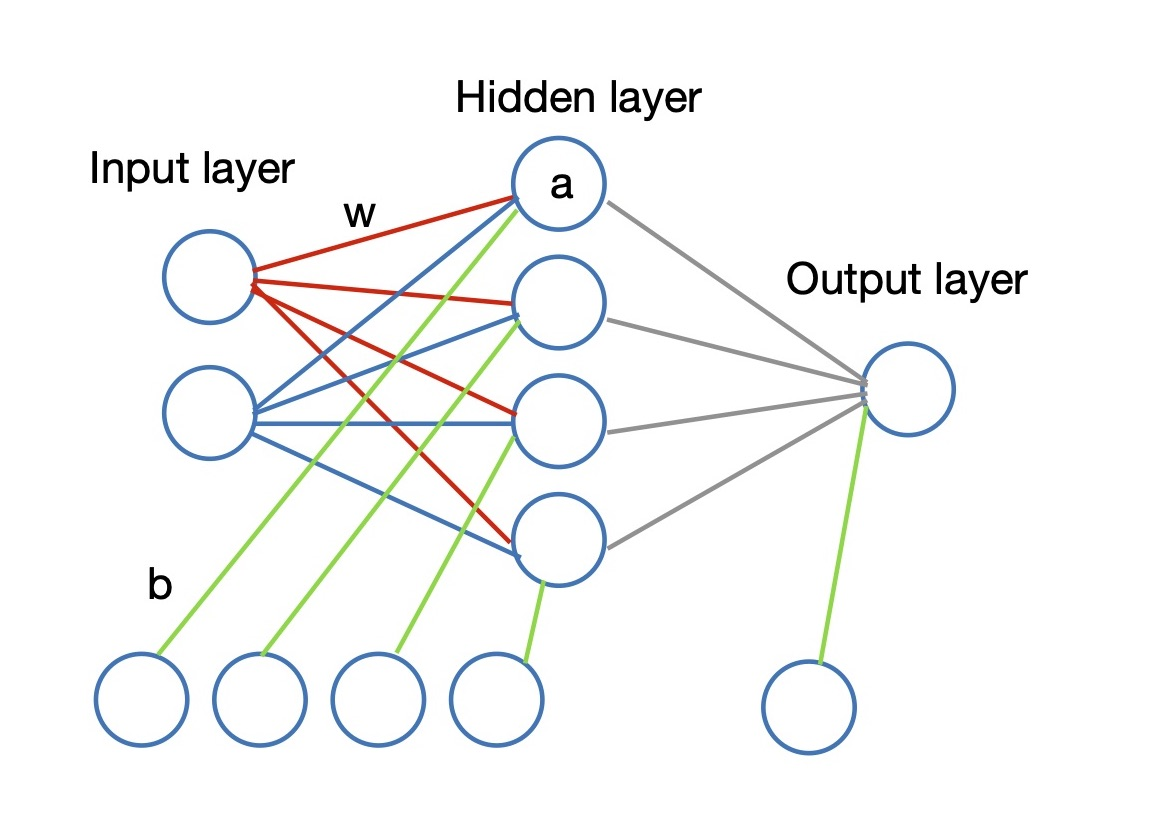

In [16]:
display.Image("figures/network.jpg")

## 2. Compilation

This is where Keras actually communicates with TensorFlow
and creates what's called a 'computation graph'. Keras is compiling
our model into a very abstract form that is implemented in C++.

One caveat about compile -- if you run this piece of code more than once in a single session, Keras will get confused.


Running Keras in Jupyter is fine, but **remember**:

    `from tensforflow.keras import backend as K
     K.clear_session()` 

You should do this everytime you use Keras, because it will clear the memory of the previously compiled model every time.

     

In [16]:
K.clear_session()
model.compile(
              optimizer='adam', # the algorithm used to optimize the weights
              loss='binary_crossentropy', # how the loss is quantified (real values)
              metrics=['accuracy'], # how good the model performs (not used by opt. algorithm)
             )

 
Some nice [explanation](https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b) of optimizers like [Adam](https://keras.io/api/optimizers/adam/)
    
ADAM optimises the network using a stochastic gradient descent. It is mentioned in the documentation that it works well if the sample size is larger in comparison to the number of parameters.

**Reminder: Stochastic gradient descent tries to minimise the gradient of the loss function using randomly chosen mini-batches.**

## 3. Fit the model to training data
 

Batch size: Number of samples per gradient update.

hint: [Machine Learning Glossary](https://developers.google.com/machine-learning/glossary) (in case you don't remember the meaning of a certain ML term)

In [17]:
history = model.fit(X,y,batch_size=128,epochs=500,validation_split=0.3

                 # verbose = False,
                )

Epoch 1/500
3/3 [==============================] - 1s 130ms/step - loss: 0.6631 - accuracy: 0.4943 - val_loss: 0.6583 - val_accuracy: 0.5133
Epoch 2/500
3/3 [==============================] - 0s 86ms/step - loss: 0.6620 - accuracy: 0.4943 - val_loss: 0.6573 - val_accuracy: 0.5200
Epoch 3/500
3/3 [==============================] - 0s 31ms/step - loss: 0.6610 - accuracy: 0.4943 - val_loss: 0.6564 - val_accuracy: 0.5200
Epoch 4/500
3/3 [==============================] - 0s 33ms/step - loss: 0.6598 - accuracy: 0.4971 - val_loss: 0.6555 - val_accuracy: 0.5267
Epoch 5/500
3/3 [==============================] - 0s 21ms/step - loss: 0.6589 - accuracy: 0.5029 - val_loss: 0.6546 - val_accuracy: 0.5267
Epoch 6/500
3/3 [==============================] - 0s 39ms/step - loss: 0.6578 - accuracy: 0.5057 - val_loss: 0.6536 - val_accuracy: 0.5333
Epoch 7/500
3/3 [==============================] - 0s 29ms/step - loss: 0.6567 - accuracy: 0.5200 - val_loss: 0.6528 - val_accuracy: 0.5400
Epoch 8/500
3/3 [==

What do the parameters mean?
- X: input values
- y: output labels/values (classification/regression)
- epochs: like the number of increments (forward-backward propagation)
- batch_size: number of samples used (reduces computational effort instead of using all samples => stochastic gradient)
- validation_split: portion of results used for validation

## 4. Evaluation

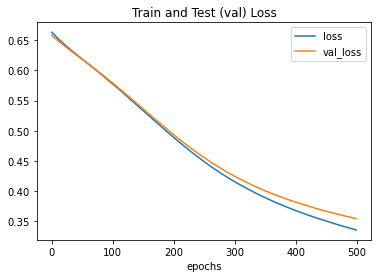

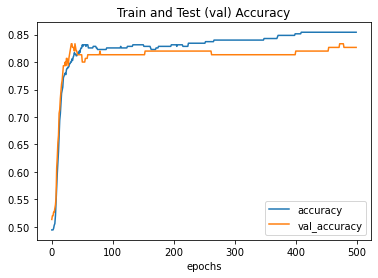

In [18]:
losses_accurs = pd.DataFrame(history.history)

losses_accurs[['loss', 'val_loss']].plot()
plt.title('Train and Test (val) Loss')
plt.xlabel('epochs')
plt.show()

losses_accurs[['accuracy', 'val_accuracy']].plot()
plt.title('Train and Test (val) Accuracy')
plt.xlabel('epochs')
plt.show()



**You can also get single elements through history.history.**

In [21]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.668327,0.494286,0.658648,0.513333
1,0.666696,0.494286,0.657302,0.513333
2,0.665149,0.494286,0.656000,0.513333
3,0.663812,0.494286,0.654708,0.513333
4,0.662290,0.494286,0.653472,0.513333
...,...,...,...,...
495,0.337684,0.854286,0.356148,0.826667
496,0.337440,0.854286,0.355930,0.826667
497,0.337152,0.854286,0.355699,0.826667
498,0.336874,0.854286,0.355475,0.826667


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## 5. Predictions
(Solution to our challenge)  
Let's assume, we want to know, whether the point (0.5, -0.5) belongs to the upper or lower half moon.  
We can predict this categorical problem with our just created model.  
According to our X and y (see above), zeros belong to the upper half moon, ones to the lower.

In [25]:
X[0]

array([-0.33629894,  1.06167458])

In [27]:
model.predict([[-0.5, 1]])

array([[0.08836135]], dtype=float32)


## Alternative model configuration with keras.layers


Many many more layer options than what we are doing exist. 

Checkout https://www.tensorflow.org/api_docs/python/tf/keras/layers



In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [29]:
K.clear_session()

model = Sequential([
    Dense(units=4,activation='sigmoid',input_shape=(2,)),# in i/p shape ',' is necessary at end when you have only one dimension
    #Dense(units=4,activation='sigmoid',input_dim = 2),            
    Dense(units=1,activation='sigmoid')
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [31]:
X.shape

(500, 2)

## How to save a model for later use

In [32]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")
# here you can stop your notebook
moons_model = load_model("model_moons.h5")
moons_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


## Summary

- We spoke about what a tensor is (n-dimensional array).  
- We tried out several network parameters (activation functions, # layers/nodes, ...) in tensorflow playground.  
- We learnt to know and used keras API to create a neural network model.  
- We performed a challenge on the two half moon problem.
- We saved and loaded the model for later use


## References
+ keras models api: https://keras.io/api/models/
+ keras layers api: https://keras.io/api/layers/
+ keras optimizer api: https://keras.io/api/optimizers/
+ keras metrics api: https://keras.io/api/metrics/
+ keras losses api: https://keras.io/api/losses/
+ To track your different experiments on models use https://www.tensorflow.org/tensorboard/get_started